In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
X_train = pd.read_csv('agg_Xtrain.csv').set_index('Unnamed: 0')
X_test = pd.read_csv('agg_Xtest.csv').set_index('Unnamed: 0')
y_train = pd.read_csv('agg_ytrain.csv').set_index('Unnamed: 0')
y_test = pd.read_csv('agg_ytest.csv').set_index('Unnamed: 0')

In [3]:
#hyperparameter tuning
Kcv = KFold(n_splits=10)
parameters = {'hidden_layer_sizes':[30,50,100],
              'alpha':[1e-6,1e-5],#,0.0001, 0.01],
              'learning_rate':['constant', 'adaptive'],
              'max_iter':[100, 200]#,500],
#              'epsilon': [1e-10, 1e-08],
}

mlp = MLPClassifier()
cv = GridSearchCV(mlp, param_grid=parameters, cv=Kcv)

In [4]:
%%time
#best params found by grid search
cv.fit(X_train,y_train)
cv.best_params_

CPU times: user 26min 55s, sys: 11.7 s, total: 27min 6s
Wall time: 4min 32s


{'alpha': 1e-05,
 'hidden_layer_sizes': 100,
 'learning_rate': 'constant',
 'max_iter': 200}

In [5]:
%%time
mlp.set_params(**cv.best_params_)
mlp.fit(X_train,y_train)
pred = mlp.predict(X_test)
f1 = f1_score(y_test, pred, average='weighted')
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')

print(f"precision: {precision}, recall: {recall}, f1score: {f1}")

precision: 0.356857308668999, recall: 0.31496062992125984, f1score: 0.3305109280795106
CPU times: user 11.6 s, sys: 65.3 ms, total: 11.6 s
Wall time: 1.94 s


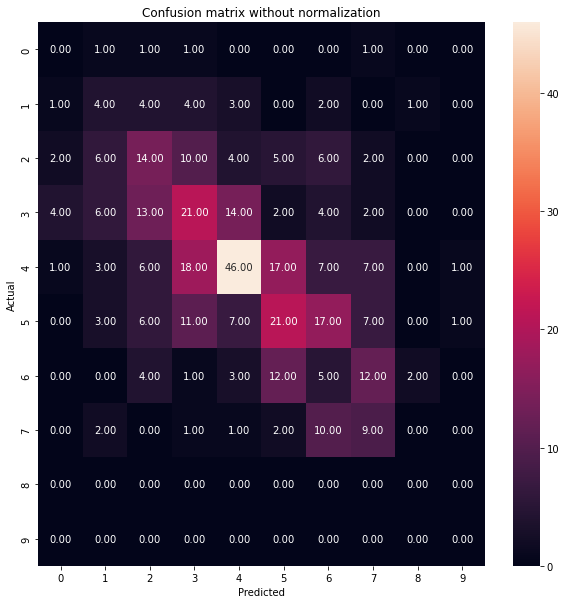

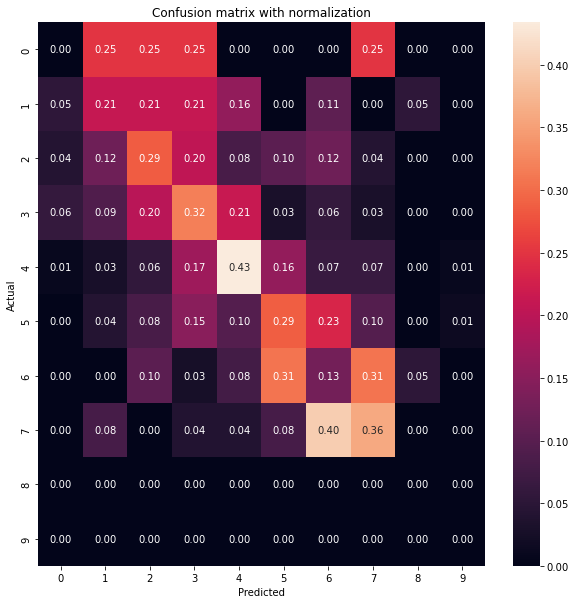

In [6]:
#plot result

matrix = confusion_matrix(y_test, pred)
matrix_normalized = confusion_matrix(y_test, pred, normalize='true')

fig1, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix, annot=True, fmt='.2f')
plt.title('Confusion matrix without normalization')
plt.ylabel('Actual')
plt.xlabel('Predicted')

fig2, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix_normalized, annot=True, fmt='.2f')
plt.title('Confusion matrix with normalization')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [11]:
print('training data')
print(classification_report(y_train, mlp.predict(X_train)))

print('test data')
print(classification_report(y_test, mlp.predict(X_test)))

training data
              precision    recall  f1-score   support

         1.0       0.98      1.00      0.99       352
         2.0       0.78      0.87      0.82       352
         3.0       0.59      0.65      0.62       352
         4.0       0.54      0.49      0.51       352
         5.0       0.62      0.51      0.56       352
         6.0       0.65      0.60      0.63       352
         7.0       0.69      0.61      0.65       352
         8.0       0.73      0.88      0.80       352
         9.0       0.98      1.00      0.99       352
        10.0       1.00      1.00      1.00       352

    accuracy                           0.76      3520
   macro avg       0.76      0.76      0.76      3520
weighted avg       0.76      0.76      0.76      3520

test data
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         4
         2.0       0.16      0.21      0.18        19
         3.0       0.29      0.29      0.29        49
